## **THE SPARKS FOUNDATION**
## **GRIP March 2023 Task 1 by Arti Khanchandani**

## **Prediction of Scores of a Student based on Number of Study Hours using Linear Regression**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### **Importing the data**

In [4]:
# Reading data from provided link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### **Exploring the data**

In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
# Count of rows in dataset
print('Number of rows in dataset =', len(data))

Number of rows in dataset = 25


In [7]:
# Check if there is any null value in the Dataset
data.isnull == True

False

There is no null or missing value in the Dataset so cleaning is not required.
Also, the dataset has only 25 points so we can plot all data points on graph to see if there seems any relationship between hours and scores.

### **Visualizing the data**

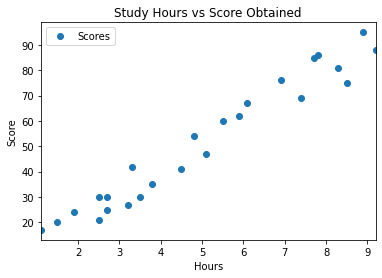

In [8]:
# Plotting distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Score Obtained')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

A positive linear relation between number of hours studied and the score obtained can be seen from the graph.

Lets plot a regression line to confirm the correlation.

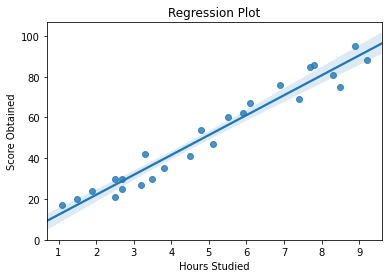

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
# Plotting the regression line along with distribution of scores 
sns.regplot(x= data['Hours'], y= data['Scores'])  
plt.title('Regression Plot')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score Obtained')  
plt.show()
# Printing correlation table to confirm
print(data.corr())

It is confirmed that score and study hours are positively correlated.

### **Preparing the data**

Next we separate the 'attribute' (input) and 'label' (output)

In [10]:
X = data.iloc[:, :-1].values # column except last column i.e. Hours
Y = data.iloc[:, 1].values   # last column i.e. Scores

### **Splitting the data**

Now we split attribute and label data into training and test set using Scikit-Learn's built-in train_test_split() method

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

### **Training the regression model on the data**
After splitting data into training and testing sets we fit the model on the data. 

In [12]:
# Importing the regression model
from sklearn.linear_model import LinearRegression 
# Initializing the model
regressor = LinearRegression()
# Fitting the model
regressor.fit(X_train, Y_train) 

print("Training complete")

Training complete


**Plotting regression line along with test data**

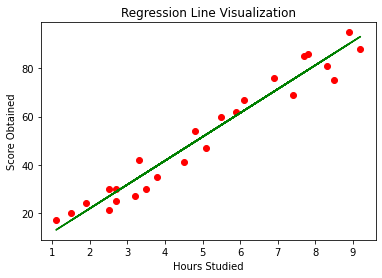

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y,color='Red')
plt.plot(X,line,color='Green');
plt.title('Regression Line Visualization')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score Obtained') 
plt.show()

### **Making Predictions**
Now that we have trained the model, it's time to make predictions.

In [14]:
# Printing Test data i.e. Hours 
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Predicting the percentage scores
Y_pred = regressor.predict(X_test) 

**Comparing the Predicted Score with the Actual Score**

In [16]:
# Comparing Actual vs Predicted score
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visually Comparing the Predicted Score with the Actual Score**

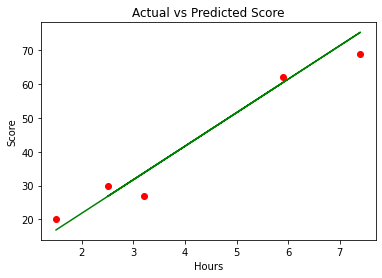

In [17]:
plt.scatter(x=X_test, y=Y_test, color='Red')
plt.plot(X_test, Y_pred, color='Green')
plt.title('Actual vs Predicted Score')
plt.ylabel('Score')
plt.xlabel('Hours')
plt.show()

 **Evaluating the model**

For evaluating the performance of algorithm, we have chosen the mean square error. 
There are many other metrics which can also be used.

In [18]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


Small value of Mean absolute error states that the chances of error or wrong forecast through the model are very less.

**Predicting score of a student who studies for 9.25 hrs/day?**

In [19]:
hours = [9.25]
pred_score = regressor.predict([hours])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(pred_score[0],3)))

No. of Hours = [9.25]
Predicted Score = 93.692


### Result
**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**